In [1]:
import os,sys
import numpy as np
from scipy.ndimage import gaussian_filter
import math
import itertools
import matplotlib.pyplot as plt
%matplotlib  widget 

In [2]:
n    = 100  #number of pixels
m    = 50   #number of realizations
nd   = 50   #number of dates
dgam = 0.93 #permanent decorrelation per time interval (random walk noise)

In [3]:
#typical permanent decorrelation noise
maxn  = np.sqrt(-2*np.log(dgam))
wgts  = np.linspace(0,1,n)
stds  = maxn*wgts
noise = np.zeros([nd,n,m])
for i in range(n):
    noise[:,i,:] = stds[i]*np.random.randn(nd,m)

avgstd=np.std(noise)

In [4]:
intid = np.array(list(itertools.combinations(range(nd), 2)))
ni      = intid.shape[0]
dt      = intid[:,1]-intid[:,0]
dts     = np.unique(dt)
slcs    = np.exp(1j*noise)
slcs    = np.cumprod(slcs,0)

ints    = slcs[intid[:,1],:,:]*np.conj(slcs[intid[:,0],:,:])
gamma   = np.mean(ints,1)
allintf = gamma/np.abs(gamma)
cors    = np.abs(gamma)
acor    = np.mean(cors,1)

In [5]:
nivar2  = np.square(avgstd)*dts              #noise based on avg. std dev
nivar3  = np.mean(np.square(stds))*dts       #noise based on wgts. 

coh2    = np.exp(-nivar2/2)
coh3a   = np.exp(-nivar3/2)
coh3b   = np.zeros(np.shape(coh2))
for i in range(len(coh2)):
    for j in range(n):
        coh3b[i]=coh3b[i]+np.exp(-np.square(stds[j])*dts[i]/2)/n

coh4   = np.zeros(np.shape(coh2))
for i in range(len(coh2)):
    coh4[i]  = np.sqrt(np.pi)*math.erf(maxn*np.sqrt(dts[i]/2))/np.sqrt(dts[i]*2)/maxn #noise from integrating expected value

$\int_{0}^{\sigma}\frac{1}{\sigma}e^{-\frac{tx^2}{2}}dx = \sigma\sqrt{pi} \frac{erf\left[\frac{\sigma\sqrt{t}}{2}\right]}{\sqrt(t*2)}$

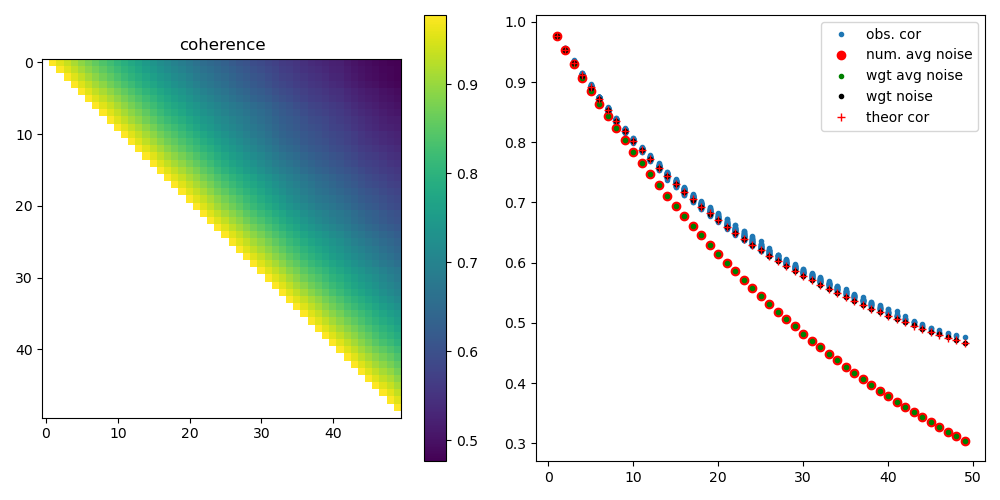

In [6]:
tmp=np.nan*np.ones((nd,nd))
plt.figure(figsize=(10,5),tight_layout='TRUE')   

tmp[intid[:,0],intid[:,1]]=acor
plt.subplot(1,2,1); plt.imshow(tmp,interpolation='nearest') #,vmin=-0.5,vmax=1.6
plt.colorbar(); plt.title('coherence')

plt.subplot(1,2,2)
plt.plot(dt,acor,'.',  label='obs. cor');
plt.plot(dts,coh2,'ro', label='num. avg noise')
plt.plot(dts,coh3a,'g.',label='wgt avg noise')
plt.plot(dts,coh3b,'k.',label='wgt noise')
plt.plot(dts,coh4,'r+', label='theor cor')
plt.legend()